In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq,ifft
from scipy.signal import convolve
import pandas as pd
from scipy.interpolate import lagrange, interp1d 
from scipy.optimize import leastsq

Populating the interactive namespace from numpy and matplotlib


In [2]:
tbl = pd.read_table('kplr000757450_q1_q16_tce_01_dvt_lc.tbl',delim_whitespace=True)
tbl.values[:,0]

array([  131.5127147,   131.5331494,   131.553584 , ...,  1557.9179758,
        1557.9384103,  1557.9588447])

In [3]:
print tbl

                 1      2         3         4  5         6         7
0       131.512715   1105  0.000001  0.000462  0 -0.000018  0.000462
1       131.533149   1106 -0.000294  0.000462  0 -0.000312  0.000462
2       131.553584   1107  0.000273  0.000462  0  0.000254  0.000462
3       131.574018   1108 -0.000331  0.000462  0 -0.000350  0.000462
4       131.594453   1109 -0.000569  0.000462  0 -0.000588  0.000462
5       131.614888   1110  0.000204  0.000462  0  0.000185  0.000462
6       131.635322   1111  0.000253  0.000462  0  0.000234  0.000462
7       131.655757   1112 -0.000120  0.000463  0 -0.000139  0.000463
8       131.676192   1113  0.001139  0.000463  0  0.001120  0.000463
9       131.696626   1114 -0.000982  0.000462  0 -0.001001  0.000462
10      131.717061   1115  0.000078  0.000462  0  0.000059  0.000462
11      131.737495   1116 -0.000638  0.000462  0 -0.000656  0.000462
12      131.757930   1117 -0.000068  0.000462  0 -0.000087  0.000462
13      131.778365   1118  0.00025

In [4]:
t=tbl.values[:,0]
fl=tbl.values[:,2]
print t

[  131.5127147   131.5331494   131.553584  ...,  1557.9179758  1557.9384103
  1557.9588447]


In [5]:
t

array([  131.5127147,   131.5331494,   131.553584 , ...,  1557.9179758,
        1557.9384103,  1557.9588447])

In [6]:
t=t[isnan(fl)==False]
fl=fl[isnan(fl)==False]
t=t[fl>-0.008]
fl=fl[fl>-0.008]

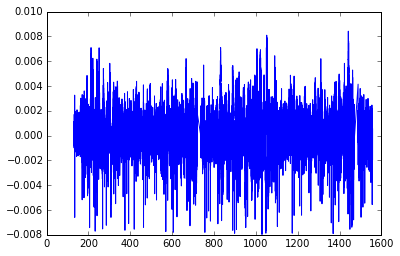

In [7]:
plt.plot(t,fl)#A

In [8]:
dis=[]
for i in range (1,len(t)):
    dis.append((t[i]-t[i-1]))
    
c=0
dis1=[]
dis1.append(dis[0])
for i in range (1,len(dis)):
    for j in range(len(dis1)):
        
        if (dis[i]==dis1[j]):
            c=1
            
    if(c==0):
        dis1.append(dis[i])
    c=0

In [9]:
dt=min(dis1)
n=len(t)

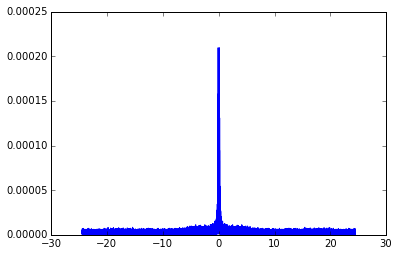

In [10]:
fft_x = fft(fl) / n # FFT Normalized
freq = fftfreq(n, dt)
plt.plot(freq,abs(fft_x))#B

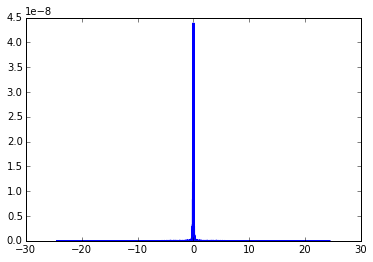

In [11]:
plt.plot(freq,abs(fft_x)**2)#Potencias

In [13]:
c=abs(fft_x).argsort()[-1:][::-1]
#encuentro el valor maximo de fft_x

In [15]:
period=1/abs(freq[c][0])#como estoy en el espectro de frecuencias el tiempo
#es 1/fft_x. Esta expresado en dias
print "el periodo mas representativo es "
print period  #c

el periodo mas representativo es 
9.13956498213


In [16]:
def prog(N):#D
    ind=(abs(fft_x)**2).argsort()[-N:][::-1]
    graf=zeros(len(fft_x))
    for i in range(len(ind)):
        graf[ind[i]]=(abs(fft_x)**2)[ind[i]]
    return graf

In [17]:

(abs(fft_x)**2)[(abs(fft_x)**2).argsort()[-10:][::-1]]

array([  4.38892855e-08,   4.38892855e-08,   3.27009088e-08,
         3.27009088e-08,   2.50295125e-08,   2.50295125e-08,
         2.12728984e-08,   2.12728984e-08,   1.97143247e-08,
         1.97143247e-08])

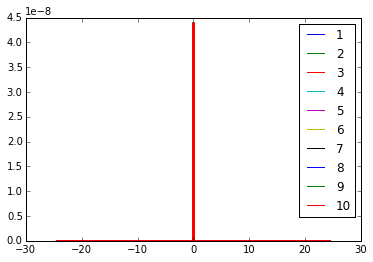

In [18]:
#D
plt.plot(freq,prog(1),label=1)
plt.plot(freq,prog(2),label=2)
plt.plot(freq,prog(3),label=3)
plt.plot(freq,prog(4),label=4)
plt.plot(freq,prog(5),label=5)
plt.plot(freq,prog(6),label=6)
plt.plot(freq,prog(7),label=7)
plt.plot(freq,prog(8),label=8)
plt.plot(freq,prog(9),label=9)
plt.plot(freq,prog(10),label=10)
plt.legend()

/home/juanc/.local/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


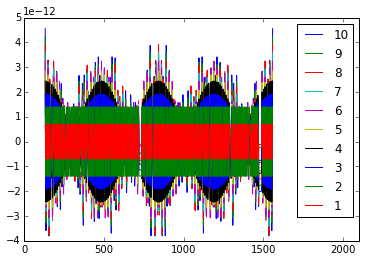

In [19]:
#D
plt.plot(t,ifft(prog(10)),label=10)
plt.plot(t,ifft(prog(9)),label=9)
plt.plot(t,ifft(prog(8)),label=8)
plt.plot(t,ifft(prog(7)),label=7)
plt.plot(t,ifft(prog(6)),label=6)
plt.plot(t,ifft(prog(5)),label=5)
plt.plot(t,ifft(prog(4)),label=4)
plt.plot(t,ifft(prog(3)),label=3)
plt.plot(t,ifft(prog(2)),label=2)
plt.plot(t,ifft(prog(1)),label=1)



plt.xlim(0,2100)
plt.legend(loc=0)

In [ ]:
lstsq()